In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data/bm.csv').to_numpy()
X = data[:, 0:2]
y = data[:, 2]

n_s = 5000
np.random.seed(7)
r = np.random.permutation(len(y))
X, y = X[r, :], y[r]
X_s, y_s = X[:n_s, :], y [:n_s]

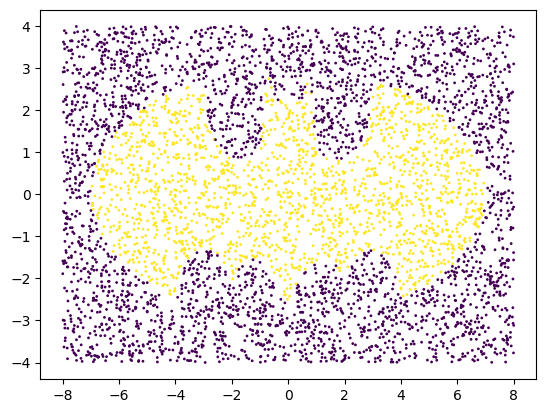

In [3]:
plt.scatter(X_s[:, 0], X_s[:, 1], c=y_s, s=1)

In [4]:
clf = rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=10, C=50))
])
clf.fit(X_s, y_s)

svc_estimator = clf.named_steps['svm_clf']
y_pred = svc_estimator.predict(X_s)
mean_training_error = 1 - (y_pred == y_s).mean()

print("Mean training error:", mean_training_error)

Mean training error: 0.33840000000000003


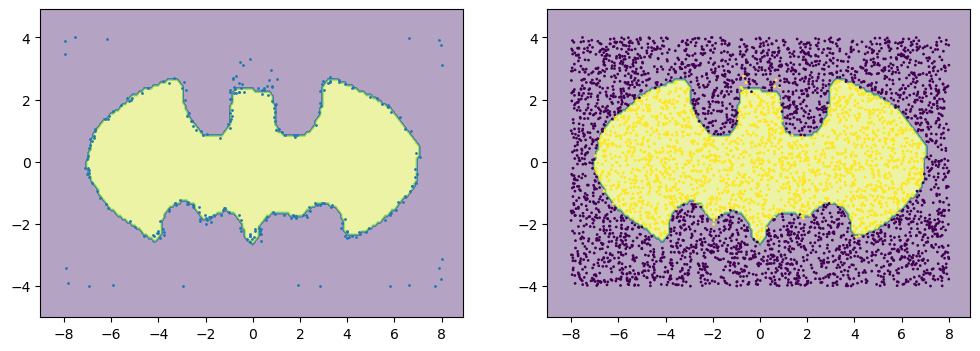

In [5]:
# Plotting the decision boundary
x_min, x_max = X_s[:, 0].min() - 1, X_s[:, 0].max() + 1
y_min, y_max = X_s[:, 1].min() - 1, X_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

support_indices = svc_estimator.support_

# plot two plots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].contourf(xx, yy, Z, alpha=0.4)
ax[0].scatter(X_s[support_indices, 0], X_s[support_indices, 1], s=1)

ax[1].contourf(xx, yy, Z, alpha=0.4)
ax[1].scatter(X_s[:, 0], X_s[:, 1], c=y_s, s=1)
